## MMC - L3 - Kacper Marchlewicz - 310195

# Zadanie 1
Celem zadania jest napisanie programu wykorzystującego Centralne Twierdzenie Graniczne do uzyskiwania zmiennych losowych o rozkładzie zbliżonym do normalnego. Procedura opiera się na następującym spostrzeżeniu:

In [8]:
from matplotlib import pyplot as plt
import math
import random
import numpy as np
from scipy.stats import norm

def calculate_y(n):
    generated_numbers = list()
    for i in range(n):
        generated_numbers.append(random.uniform(0.0, 1.0))
    Y = (sum(generated_numbers) - n/2) / math.sqrt(n/12)
    return Y

def generate(n, count):
    generated_numbers = list()
    for i in range(count):
        generated_numbers.append(calculate_y(n))
    return generated_numbers

Dla wygenerowanej zmiennej należy wyznaczyć histogram częstości dla przedziału zmienności [-4,4], wyświetlić go i porównać z kształtem teoretycznej funkcji gęstości prawdopodobieństwa. Wykonano to w poniższym fragmencie kodu:

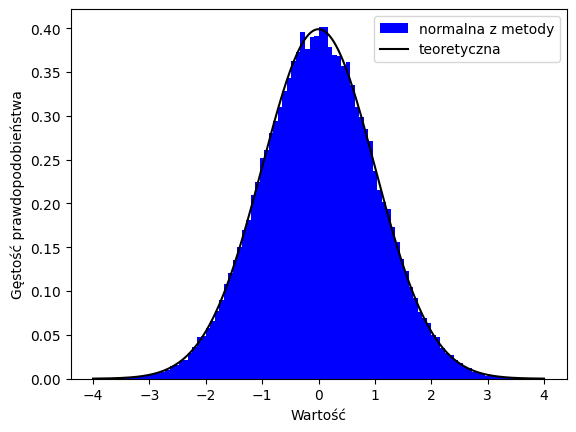

In [9]:
n=20
count = 100000
numbers_method = generate(n, count)

# Rysujemy histogram częstości
plt.hist(numbers_method, density=True, color='blue', range=(-4.0, 4.0), bins=100, label='normalna z metody')
# Wartości na osi X histogramu.
dziedzina = np.linspace(-4.0, 4.0, count)
# Rysujemy również teoretyczną funkcję gęstości prawodpodobieństwa.
plt.plot(dziedzina, norm.pdf(dziedzina), 'k-', label='teoretyczna')
plt.xlabel('Wartość')
plt.ylabel('Gęstość prawdopodobieństwa')
plt.legend(loc='best')
plt.show()

Można zaobserwować, że rzeczywiscie rozkład ten jest podobny do rozkładu normalnego N(0,1). Największe niedokładności widać w okolicy wartości 1, lecz są one akceptowalne.

# Zadanie 3
Korzystając z opisanej w poleceniu metody eliminacji i superpozycji, należy wygenerować liczby losowe o funkcji gęstości prawdopodobieństwa z podanym w poleceniu wzorem. Do generowania liczb zgodnie z metodą eliminacji utworzono następujące funkcje:

In [10]:
from matplotlib import pyplot as plt
import math
import random
import numpy as np
from scipy.stats import norm

def f(x):
    y = (5/12)*(1 + pow((x-1),4))
    return y 

def calculate_elimination(a,b):
    searching = True
    while(searching):
        u1 = random.uniform(a,b)
        u2 = random.uniform(0.0,10/12)
        if ( u2 < f(u1) ):
            X = u1
            searching = False    
    return X

def generate_elimination(a,b, count):
    generated_numbers = list()
    for i in range(count):
        generated_numbers.append(calculate_elimination(a,b))
    return generated_numbers

Do generacji liczb zgodnie z metodą superpozycji utworzono następujący kod:

In [11]:
def generate_superposition(a,b, count):
    generated_numbers = list()
    for i in range(count):
        u1 = random.uniform(a,b)
        u2 = random.uniform(0.0,1.0)
        if (u2 < 5/6):
            X = u1
        elif (u2 >= 5/6):
            z = (u1 - 1.0)
            if z < 0:
                pow = -((-z)**(1/5))
            elif z > 0:
                pow = z**(1/5)
            else:
                pow = 0
            X = 1.0 + pow
        generated_numbers.append(X)
    return generated_numbers

Następnie porównano je z podanym w poleceniu rozkładem:

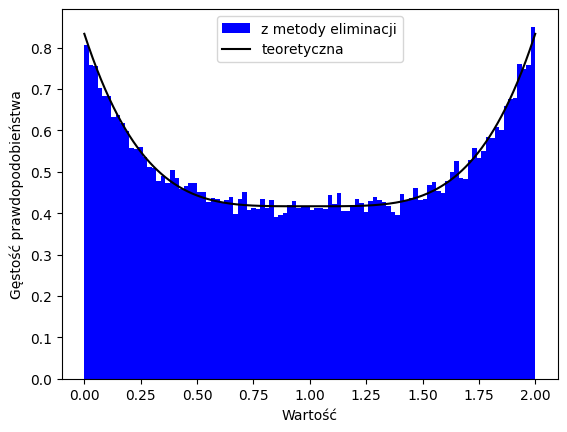

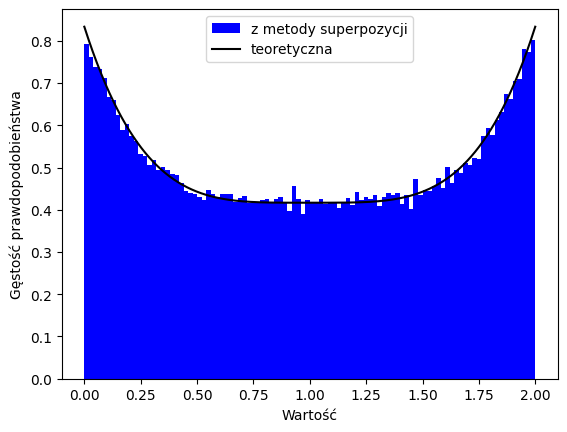

In [12]:
a=0.0
b=2.0
count = 100000
numbers_elimination = generate_elimination(a,b, count)
numbers_superposition = generate_superposition(a,b, count)

# Rysujemy histogram częstości
plt.hist(numbers_elimination, density=True, color='blue', range=(a,b), bins=100, label='z metody eliminacji')
# Wartości na osi X histogramu.
dziedzina = np.linspace(a, b, count)
# Rysujemy również teoretyczną funkcję gęstości prawodpodobieństwa.
plt.plot(dziedzina, f(dziedzina), 'k-', label='teoretyczna')
plt.xlabel('Wartość')
plt.ylabel('Gęstość prawdopodobieństwa')
plt.legend(loc='best')
plt.show()

# Rysujemy histogram częstości
plt.hist(numbers_superposition, density=True, color='blue', range=(a,b), bins=100, label='z metody superpozycji')
# Wartości na osi X histogramu.
dziedzina = np.linspace(a, b, count)
# Rysujemy również teoretyczną funkcję gęstości prawodpodobieństwa.
plt.plot(dziedzina, f(dziedzina), 'k-', label='teoretyczna')
plt.xlabel('Wartość')
plt.ylabel('Gęstość prawdopodobieństwa')
plt.legend(loc='best')
plt.show()

Obie metody dość dobrze oddają kształt podanej funkcji gęstości, można stwiedzić, że metody generują liczby zgodnie z podanym rozkładem.